<a href="https://colab.research.google.com/github/HussainPythonista/image_classification_CIFAR_10/blob/main/image_Classification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR-10

- The dataset contains the 60000 images with 32X32 size

- 50000 training dataset and 10000 test dataset

- It has five 5 training batches and each training batch contains 10000 images

- Test batch contains 10000 images

### - Loading and Visualize the data

Here i'm gonna import necessary libraries

importing dataset

visualize some of the datasets

In [77]:
#Importing necessary libraries

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np

In [78]:
#Loading datasets

(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [79]:
#Label for human read classification

labels=["airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

In [80]:
#Checking the shape of test and train
print("Shape of train dataset ",X_train.shape)
print("Shape of class ",y_train.shape)
print("Shape of test dataset ",X_test.shape)

Shape of train dataset  (50000, 32, 32, 3)
Shape of class  (50000, 1)
Shape of test dataset  (10000, 32, 32, 3)


50000 is number of images

32 and 32 is size of an image ie height and width

3 is the number of channels RGB

The given image is  dog


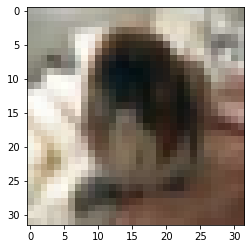

In [81]:
def imageDetails(wantToVisulize,index):
  if wantToVisulize=="Train":
    plt.imshow(X_train[index])
    print("The given image is ",labels[int(y_train[index])])
  if wantToVisulize=="Test":
    plt.imshow(X_test[index])
    print("The given image is ",labels[int(y_test[index])])
#Index should be less than 500000 if we want to visualize the Xtrain dataset
#Index should be less than 100000 if we want to visualize the Xtest dataset
index=200
wantToVisulize="Test"
imageDetails(wantToVisulize,index)

* Checking and changing the y_trian

* Mostly the classes or output labels of dataset is in 2D array format,but i want labels in 1D format better change that before do further operation



In [82]:
#Checking the shape of labels
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

If u see above we can clearly see that our output is in 2D format but we want one dimension so we need to change that

In [83]:
#Checking shape
y_train.shape

(50000, 1)

In [84]:
#Checking other method as well
y_train=y_train.reshape(-1,1)
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [85]:
#Changing shape to 1D array
# y_train=y_train.reshape(-1,1000)
# print(y_train.shape)
# y_train

### Image Preprocessing

- Normalizing each pixel is most important step in image preprocessing

- We simply divide the pixel with/255 thats it

- Change the y_train values into categorical

In [86]:
#Checking pixels of on image
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [87]:
#Checking the same matrix after normalize it
X_train[0]/255


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

It brings value between 0 to 1

In [88]:
#Scaling the Whole X_train Values
X_train_scaled=X_train/255

**Note:**

Most important thing to know

- When we work on the ANN for classification,the most important thing to remember is Loss 
    
    "If we use categorical_entropy as loss we should convert the labels into one-hot encoding we can convert it into categorical by keras.utils.to_categorical() function"

    "At the same time if we use sparse_categorical_entropy as loss we shoul reshape the output into 1D array,"

In [89]:
#Change the y_train values as categorical which will help us to classify after fed into neural network

y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype="float32"
)

In [90]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
#Checking other method as well
y_train=y_train.reshape(-1,)
print(y_train.shape)
y_train

(50000,)


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

## Model building

- Here i'm going to start with Normal ANN Architecture for this classification

- And i go further build CNN in same dataset without any regularization

- At final i build model with some hyperparameter like BatchNormalization,Dropouts,L2 

##### Build ANN model for image classification
I create the ANN for image classification with below compile parameters

optimizer="SGD" - Stocastic gradient boosting

loss="sparse_categorical_crossentropy" -- Because the output labels are in 1,2,3, format,better use sparse_categorical_entropy

metrics=["accuracy"] - We estimate it with accuracy value

In [92]:
#Creating Sequential model

model=keras.Sequential([
                    layers.Flatten(input_shape=(32,32,3)),
                    layers.Dense(3000,activation="relu"),
                    layers.Dense(1000,activation="relu"),
                    layers.Dense(10,activation="sigmoid"),

])

#Compile the model with loss evaluation metrics and optimizer
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_scaled,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8137 - accuracy: 0.3551
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6228 - accuracy: 0.4260
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5415 - accuracy: 0.4567
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4818 - accuracy: 0.4762
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4330 - accuracy: 0.4972
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3895 - accuracy: 0.5114
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3508 - accuracy: 0.5264
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3157 - accuracy: 0.5390
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2827 - accuracy: 0.5491
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.254

**After fitting the ANN for the dataset we can clearly see that**

- There is no reduction in loss which means the back propagation doesn't reduce the loss

- Accuracy is also didn't reduce

- This is indicate the ANN is not suitable for this particular problem

##### Fitting CNN Model

Here I'm gonna fit the same dataset with CNN Architecture

- The most important thing to remember,when you use softmax as activation function as final layer we normalize the output probablity,if we add the probality value then sum will be 1

- The sigmoid activation function will give exactly same output value without normalize it



In [93]:
exampleVal=[33,44]

In [94]:

#Softmax Value
softmax1=33/sum(exampleVal)
softmax2=44/sum(exampleVal)
print(softmax1,softmax2)
#Sum will be 1
print("Softmax Sum",(softmax1+softmax2))

0.42857142857142855 0.5714285714285714
Softmax Sum 1.0


In [95]:
#Sigmoid value

print(exampleVal[0],exampleVal[1])
#Sum will be 1
print("Softmax Sum",(exampleVal[0]+exampleVal[1]))

33 44
Softmax Sum 77


Explanations for parameters for sequential layer

##### Conv2D

  - Conv means Convolution 
  - 2D means 2DImage

  - Parameters

  In convolution we detect the feature

  In first convolution we need to specify input_shape

  In Conv2D we only specify the number of filters(feature maps) and filter size,the Convolution by itself find better filter for us and fit it for us too,

  and specify activation function as well 

  we no need to specify any specific filter weights and more

**MaxPooling2d**

- Here we are pick main feature of particular feature maps

- Here is also only specify filter size and stride as well

In [96]:
cnn=keras.Sequential([
                    

#                   #CNN Layer
                    #First convolution layer
                    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
                    layers.MaxPooling2D((2,2)),

                    #Second convolution Layer
                    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),

                    #We have some matrics value as input and this is come from previous CNN layers we should simply flatten that
                    #We dont need specify input size 
                    #The Network can figure it out automatically
                    layers.Flatten(),
                    #We dont need that much dense layer
                    #CNN would done so many dense work
                    layers.Dense(64,activation="relu"),

                    #layers.Dense(32,activation="relu"),

                    layers.Dense(10,activation="softmax"),

])


In [97]:
#Compile the model with some parameters
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [98]:
#Fitting the model with train dataset
cnn.fit(X_train_scaled,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4887 - accuracy: 0.4627
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1440 - accuracy: 0.5987
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0224 - accuracy: 0.6432
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9354 - accuracy: 0.6745
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8714 - accuracy: 0.6976
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8216 - accuracy: 0.7155
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7720 - accuracy: 0.7309
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7305 - accuracy: 0.7464
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6888 - accuracy: 0.7613
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.654

**Evaluate it with Test dataset**



In [99]:
#Preproccsess the data

X_test=X_test/255
y_test=y_test.reshape(-1,)

In [100]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [101]:
#Evaluate the model
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0241 - accuracy: 0.6852


[1.0241456031799316, 0.6851999759674072]

In [102]:
#Predict the X_test
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[9.37843215e-05, 3.58922625e-05, 5.85895177e-05, 9.67423558e-01,
        5.67977200e-04, 3.12172286e-02, 2.92131561e-04, 3.27742855e-05,
        1.91554791e-04, 8.65694674e-05],
       [2.12097471e-03, 3.83791979e-03, 4.00107268e-07, 6.00489557e-07,
        1.71694587e-08, 1.99873629e-08, 2.83060708e-09, 3.34882705e-10,
        9.93688524e-01, 3.51533294e-04],
       [9.27618071e-02, 3.19596268e-02, 8.42640933e-04, 4.02732519e-03,
        7.00600154e-04, 9.82860220e-04, 3.13814875e-04, 9.93129797e-05,
        5.33084810e-01, 3.35227162e-01],
       [9.74008918e-01, 3.60329977e-05, 5.63234789e-03, 6.53557619e-03,
        7.21493876e-03, 2.51686579e-04, 1.10999725e-04, 2.00642709e-04,
        5.95289469e-03, 5.59320324e-05],
       [1.22760175e-08, 9.98497399e-06, 1.21736992e-03, 1.47315755e-01,
        5.64951956e-01, 2.86678784e-02, 2.57817656e-01, 3.67200848e-08,
        1.93536616e-05, 2.42859510e-09]], dtype=float32)

In [103]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [104]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

After my first model fit my model predict some images as wrong

better handle

My model is overfit so i need to handle that as well

hyperparameter tuning

In [105]:
# model architecture
model_drop = keras.Sequential()
model_drop.add(keras.layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model_drop.add(keras.layers.Activation('relu'))
model_drop.add(keras.layers.Conv2D(32, (3, 3)))
model_drop.add(keras.layers.Activation('relu'))
model_drop.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_drop.add(keras.layers.Dropout(0.25))

model_drop.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model_drop.add(keras.layers.Activation('relu'))
model_drop.add(keras.layers.Conv2D(64, (3, 3)))
model_drop.add(keras.layers.Activation('relu'))
model_drop.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_drop.add(keras.layers.Dropout(0.25))

model_drop.add(keras.layers.Flatten())
model_drop.add(keras.layers.Dense(512))
model_drop.add(keras.layers.Activation('relu'))
model_drop.add(keras.layers.Dropout(0.5))
model_drop.add(keras.layers.Dense(10))
model_drop.add(keras.layers.Activation('softmax'))

In [106]:
# summary

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_15 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_16 (Dense)            (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_drop.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [108]:
# train 
model_drop.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1198 - accuracy: 0.2096
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8010 - accuracy: 0.3433
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5861 - accuracy: 0.4206
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4526 - accuracy: 0.4704
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3623 - accuracy: 0.5085
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2934 - accuracy: 0.5347
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2335 - accuracy: 0.5600
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1801 - accuracy: 0.5799
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1334 - accuracy: 0.5976
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.088

In [109]:
model_drop.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6087 - accuracy: 0.7952


[0.6086937189102173, 0.795199990272522]

The model accuracy increase sequentially and model loss is also decrease by some sequential manner, this happen because of dropouts becase it dropped some of the neurons in each layer

After evaluate it with the test data accuracy is also increase from 68 to 79.5

But we want to note here is that the model accuracy is only atteende 85 after 50 epoches,it happen because of dropouts. 